In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Generate some random linear-looking data

Text(0, 0.5, 'y')

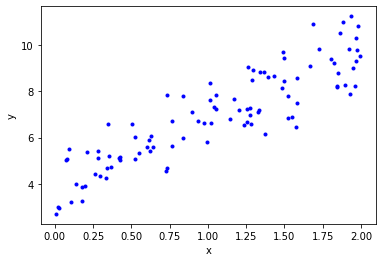

In [34]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X ,y, "b.")
plt.xlabel('x')
plt.ylabel('y')

Fit it with the normal equation $\theta_{best} = (X^T X)^{-1} X^T y$

In [35]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.89775613],
       [2.9287887 ]])

In [36]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x_0 = 1
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.89775613],
       [9.75533353]])

Plot the model's prediction

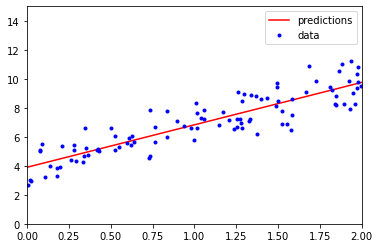

In [37]:
plt.plot(X_new, y_predict, "r-", label="predictions")
plt.plot(X, y, "b.", label="data")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

Do linear regression using scikit-learn.

In [38]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.89775613]), array([[2.9287887]]))

In [39]:
lin_reg.predict(X_new)

array([[3.89775613],
       [9.75533353]])

Linear regression is based on `numpy.linalg.lstsq()`, i.e. least squares.

In [40]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.89775613],
       [2.9287887 ]])

Using least squares with `numpy` computes the pseudoinverse, such that $\theta = X^+ y$ where $X^+$ is the pseudoinverse. Compute the pseudoinverse with `np.linalg.pinv()`

In [41]:
np.linalg.pinv(X_b).dot(y)

array([[3.89775613],
       [2.9287887 ]])

Let's do a quick implementation of gradient descent.

In [43]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[3.89775613],
       [2.9287887 ]])

Let's do a quick implementation of stochastic gradient descent

In [46]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        
theta

array([[3.88056125],
       [2.92436498]])

Let's do stochastic gradient descent using scikit-learn

In [47]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel()) # ravel flattens an array into 1D
sgd_reg.intercept_, sgd_reg.coef_

(array([3.84932167]), array([2.89712793]))